In [2]:
import os
import pandas as pd
import numpy as np

#시각화
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
# 에러메세지가 안나오게 하는 라이브러리
import warnings
warnings.filterwarnings(action='ignore')

In [11]:
path= './data/'
os.listdir(path)

['블록별 성별연령대별 카드소비패턴.csv',
 '블록별 시간대별소액결제건수 카드소비패턴.csv',
 '집계구별 일별소비지역별 카드소비패턴.csv',
 '집계구별 일별시간대별 카드소비패턴.csv',
 '카드소비 업종코드.csv']

# 업종 코드/클래스

* cd_class : 카드소비 업종코드

## 데이터 불러오기 & 살펴보기

In [23]:
cd_class = pd.read_csv(path+'카드소비 업종코드.csv', encoding='cp949')
cd_class.sample(2)

,업종코드(UPJONG_CD),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3)
32,ss035,여행/교통,숙박,호텔/콘도
62,ss066,주유,주유,주유소


In [33]:
cd_class.shape

(75, 4)

In [26]:
cd_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   업종코드(UPJONG_CD)  75 non-null     object
 1   대분류(CLASS1)      75 non-null     object
 2   중분류(CLASS2)      75 non-null     object
 3   소분류(CLASS3)      75 non-null     object
dtypes: object(4)
memory usage: 2.5+ KB


## 💁‍♀️ 데이터를 살펴본 결과

아래 3가지가 필요함을 느꼈다-!
* 열 이름 바꾸기 (영어 없애기)
* 각 대/중/소 분류별 데이터 확인하기
* 결측값 확인하기

### 열 이름 바꾸기 (영어 없애기)

In [29]:
cd_class.columns

Index(['업종코드(UPJONG_CD)', '대분류(CLASS1)', '중분류(CLASS2)', '소분류(CLASS3)'], dtype='object')

In [30]:
cd_class.columns = ['업종코드', '대분류', '중분류', '소분류']

In [31]:
cd_class.head(1)

,업종코드,대분류,중분류,소분류
0,ss001,요식/유흥,한식,한식


### 각 대/중 분류별 데이터 확인하기 

In [34]:
# 대분류
cd_class.대분류.value_counts()

스포츠/문화/레저    12
요식/유흥        11
교육/학원         7
유통            6
여행/교통         6
가정생활/서비스      6
의료            6
의류/잡화         4
음/식료품         3
미용            3
가전/가구         3
자동차           3
전자상거래         3
주유            2
Name: 대분류, dtype: int64

In [69]:
cd_class.대분류.nunique()

14

In [38]:
# 중분류
cd_class.중분류.value_counts()

스포츠/문화/레저      9
학원             5
병원             4
음/식료품          3
서비스            3
일식/중식/양식       3
여행             3
스포츠/문화/레저용품    3
전자상거래          3
가전/가구          3
할인점/슈퍼마켓       3
유흥             3
제과/커피/패스트푸드    3
패션/잡화          3
숙박             2
자동차서비스/용품      2
미용서비스          2
주유             2
각종요금           2
기타의료           1
교육용품           1
자동차판매          1
약국             1
한식             1
유아교육           1
인테리어           1
화장품            1
의복/의류          1
기타유통           1
편의점            1
백화점            1
기타요식           1
교통             1
Name: 중분류, dtype: int64

In [70]:
cd_class.중분류.nunique()

33

In [58]:
# 대/중/소 분류별 어떻게 연결되어있나 확인
# sample 여러번 시도하면서 확인하기
cd_class[["대분류","중분류","소분류"]].sample(5)

,대분류,중분류,소분류
28,스포츠/문화/레저,스포츠/문화/레저,서점
48,교육/학원,유아교육,유아교육
74,교육/학원,학원,취미/전문학원
55,의료,기타의료,기타의료
3,요식/유흥,일식/중식/양식,중식


**`중분류의 경우`**
<br></br>
    1) 대분류와 중분류가 동일한 이름인 경우  
    2) 중분류와 소분류가 동일한 이름인 경우  
    3) 중분류가 소분류의 통합인 이름인 경우가 확인됨

In [71]:
# 1) 대분류와 중분류가 동일한 경우 구하기
sum(cd_class.대분류==cd_class.중분류)

20

In [75]:
# 2) 중분류와 소분류가 동일한 이름인 경우
sum(cd_class.중분류==cd_class.소분류)

17

In [78]:
# 3) 중분류가 소분류의 통합인 경우
cd_class[(cd_class.중분류.apply(lambda x: "/"in list(x)))
         &(cd_class.대분류==cd_class.중분류)
         &(cd_class.중분류!=cd_class.소분류)]

,업종코드,대분류,중분류,소분류
17,ss018,음/식료품,음/식료품,정육점
18,ss019,음/식료품,음/식료품,농수산물
19,ss020,음/식료품,음/식료품,기타음/식료품
24,ss027,스포츠/문화/레저,스포츠/문화/레저,종합레저시설
25,ss028,스포츠/문화/레저,스포츠/문화/레저,영화/공연
26,ss029,스포츠/문화/레저,스포츠/문화/레저,스포츠시설
27,ss030,스포츠/문화/레저,스포츠/문화/레저,취미/오락
28,ss031,스포츠/문화/레저,스포츠/문화/레저,서점
56,ss060,가전/가구,가전/가구,가전
57,ss061,가전/가구,가전/가구,가구


⭐ 중분류를 제거하고 **대분류 / 소분류**만 사용하기

### 결측값 확인하기

In [79]:
cd_class.isnull().sum()

업종코드    0
대분류     0
중분류     0
소분류     0
dtype: int64

# 집계구별

* reg_time : **집계구별**  **일별 시간대별** 카드소비패턴
* reg_adr : **집계구별**  **일별 소비지역별** 카드소비패턴

## 데이터 불러오기 & 살펴보기

🌞**집계구별 일별 시간대별 카드소비패턴(reg_time)**

In [123]:
reg_time = pd.read_csv(path+'집계구별 일별시간대별 카드소비패턴.csv', encoding='cp949')
reg_time.sample(2)

,업종대분류(UPJONG_CLASS1),기준일자(YMD),시간대구간(TIME),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
389,의료,20200313,5,1116059010014,1279431,15
201,주유,20191106,3,1121079020116,126253,10


In [114]:
reg_time.shape

(500, 6)

In [27]:
reg_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   업종대분류(UPJONG_CLASS1)  500 non-null    object
 1   기준일자(YMD)             500 non-null    int64 
 2   시간대구간(TIME)           500 non-null    int64 
 3   고객주소집계구별(TOT_REG_CD)  500 non-null    int64 
 4   카드이용금액계(AMT_CORR)     500 non-null    int64 
 5   카드이용건수계(USECT_CORR)   500 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ KB


🌞 **집계구별 일별소비지역별 카드소비패턴(reg_adr)**

In [115]:
reg_adr = pd.read_csv(path+'집계구별 일별소비지역별 카드소비패턴.csv', encoding='cp949')
reg_adr.sample(2)

,가맹점주소광역시도(SIDO),가맹점주소시군구(SGG),업종대분류(UPJONG_CLASS1),기준일자(YMD),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
495,서울,종로구,가전/가구,20201108,1120055030005,55330,10
35,서울,NaN,요식/유흥,20180420,1119061030002,22132,20


In [28]:
reg_adr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   가맹점주소광역시도(SIDO)       500 non-null    object
 1   가맹점주소시군구(SGG)         442 non-null    object
 2   업종대분류(UPJONG_CLASS1)  500 non-null    object
 3   기준일자(YMD)             500 non-null    int64 
 4   고객주소집계구별(TOT_REG_CD)  500 non-null    int64 
 5   카드이용금액계(AMT_CORR)     500 non-null    int64 
 6   카드이용건수계(USECT_CORR)   500 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 27.5+ KB


In [81]:
reg_adr.shape

(500, 7)

## 💁‍♀️ 데이터를 살펴본 결과 

**< reg_time >** 
* 데이터 모두 열 이름 바꾸기 (영어 없애기)
* 열 중 업종대분류/고객주소집계구별-> 대분류/고객집계구별로 바꾸기
* 기준일자는 date 타입으로 바꾸기  
* 결측값 확인하기
* 이상치 확인하기  
* 시간대구간은 어떤 것을 의미하는지 value_counts로 확인하고, 이후 타입 선택과 어떻게 처리할지 생각해보기  

**< reg_adr >** 
* 데이터 모두 열 이름 바꾸기 (영어 없애기)
* 열 중 가맹점주소광역시도/가맹점주소시군구/고객주소집계구별 -> 가맹점광역시도/가맹점시군구/고객집계구별로 바꾸기
* 기준일자는 date 타입으로 바꾸기  
* 결측값 확인하기
* 이상치 확인하기

⭐**이후, 행 수가 동일한 점을 보아, reg_time과 reg_adr를 합칠 수 있나 확인하기**

### reg_time

#### 데이터 모두 열 이름 바꾸기 (영어 없애기)

In [88]:
reg_time.columns

Index(['업종대분류(UPJONG_CLASS1)', '기준일자(YMD)', '시간대구간(TIME)',
       '고객주소집계구별(TOT_REG_CD)', '카드이용금액계(AMT_CORR)', '카드이용건수계(USECT_CORR)'],
      dtype='object')

In [141]:
reg_time.columns = ['대분류', '기준일자', '시간대구간', '고객집계구별', '카드이용금액계', '카드이용건수계']

In [142]:
reg_time.sample()

,대분류,기준일자,시간대구간,고객집계구별,카드이용금액계,카드이용건수계
34,의료,20190102,2,1116054040206,598570,5


#### 기준일자는 date 타입으로 바꾸기

In [98]:
# 현재 타입
reg_time.기준일자.dtype

dtype('int64')

In [111]:
# 문자열로 바꾸고 이후 날짜형타입으로 바꾸기

reg_time.기준일자 = reg_time.기준일자.astype('str')
print(reg_time.기준일자)
reg_time.기준일자 = pd.to_datetime(reg_time.기준일자)
print(reg_time.기준일자)

0      20161004
1      20210303
2      20170606
3      20171206
4      20160909
         ...   
495    20170727
496    20190406
497    20210107
498    20200426
499    20160625
Name: 기준일자, Length: 500, dtype: object
0     2016-10-04
1     2021-03-03
2     2017-06-06
3     2017-12-06
4     2016-09-09
         ...    
495   2017-07-27
496   2019-04-06
497   2021-01-07
498   2020-04-26
499   2016-06-25
Name: 기준일자, Length: 500, dtype: datetime64[ns]


#### 결측값 확인하기

In [143]:
reg_time.isnull().sum()

대분류        0
기준일자       0
시간대구간      0
고객집계구별     0
카드이용금액계    0
카드이용건수계    0
dtype: int64

#### 이상치 확인하기

In [152]:
plt.rc("font", family="Malgun Gothic")

In [157]:
#지수표현없애서 출력하기
pd.options.display.float_format = '{:.5f}'.format
reg_time.카드이용금액계.describe()

count        500.00000
mean      657846.89400
std      2221250.63432
min            5.00000
25%        78505.50000
50%       269834.50000
75%       632651.00000
max     40847926.00000
Name: 카드이용금액계, dtype: float64

<AxesSubplot:>

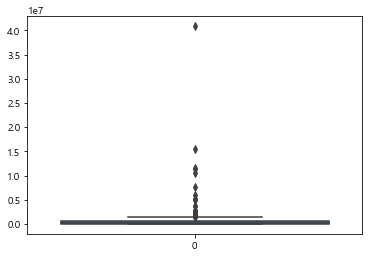

In [158]:
pd.options.display.float_format = '{:.5f}'.format
sns.boxplot(data=reg_time.카드이용금액계)

===> 최대최소 차이가 너무 나서 표현식 바꿀 것인지, 최대값을 이상치 처리할지 정하기

#### 시간대구간은 어떤 것을 의미하는지 value_counts로 확인하고, 이후 타입 선택과 어떻게 처리할지 생각해보기 

In [130]:
reg_time.시간대구간.value_counts()

3    111
5    108
4    107
6     71
2     71
1     32
Name: 시간대구간, dtype: int64

==> 시간대구간의 경우 서울특별시빅데이터캠프에 물어보기

### reg_adr

#### 데이터 모두 열 이름 바꾸기 (영어 없애기)

In [132]:
reg_adr.columns

Index(['가맹점주소광역시도(SIDO)', '가맹점주소시군구(SGG)', '업종대분류(UPJONG_CLASS1)', '기준일자(YMD)',
       '고객주소집계구별(TOT_REG_CD)', '카드이용금액계(AMT_CORR)', '카드이용건수계(USECT_CORR)'],
      dtype='object')

In [144]:
reg_adr.columns = ['가맹점광역시도', '가맹점시군구', '대분류', '기준일자',
       '고객집계구별', '카드이용금액계', '카드이용건수계']

In [145]:
reg_adr.sample()

,가맹점광역시도,가맹점시군구,대분류,기준일자,고객집계구별,카드이용금액계,카드이용건수계
384,서울,성남시,요식/유흥,20161001,1108084010004,128265,5


#### 기준일자는 date 타입으로 바꾸기

In [146]:
# 현재 타입
reg_adr.기준일자.dtype

dtype('int64')

In [148]:
# 문자열로 바꾸고 이후 날짜형타입으로 바꾸기

reg_adr.기준일자 = reg_adr.기준일자.astype('str')
print(reg_adr.기준일자)

reg_adr.기준일자 = pd.to_datetime(reg_adr.기준일자)
print(reg_adr.기준일자)

0      20201021
1      20170312
2      20161205
3      20201210
4      20210216
         ...   
495    20201108
496    20180901
497    20160326
498    20160804
499    20210628
Name: 기준일자, Length: 500, dtype: object
0     2020-10-21
1     2017-03-12
2     2016-12-05
3     2020-12-10
4     2021-02-16
         ...    
495   2020-11-08
496   2018-09-01
497   2016-03-26
498   2016-08-04
499   2021-06-28
Name: 기준일자, Length: 500, dtype: datetime64[ns]


#### 결측값 확인하기

In [131]:
reg_adr.isnull().sum()

가맹점주소광역시도(SIDO)          0
가맹점주소시군구(SGG)           58
업종대분류(UPJONG_CLASS1)     0
기준일자(YMD)                0
고객주소집계구별(TOT_REG_CD)     0
카드이용금액계(AMT_CORR)        0
카드이용건수계(USECT_CORR)      0
dtype: int64

<AxesSubplot:>

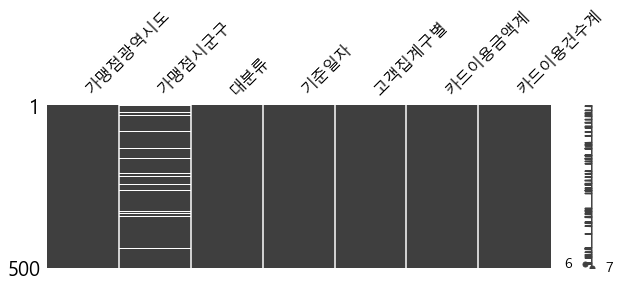

In [169]:
# 결측값 찾기 - 시각화
import missingno as msno
msno.matrix(reg_adr,figsize=(10,3))

#### 이상치 확인하기

In [170]:
#지수표현없애서 출력하기
pd.options.display.float_format = '{:.5f}'.format
reg_adr.카드이용금액계.describe()

count       500.00000
mean     321541.92600
std      707236.82556
min        2515.00000
25%       37712.50000
50%      112295.00000
75%      274147.50000
max     6850860.00000
Name: 카드이용금액계, dtype: float64

<AxesSubplot:>

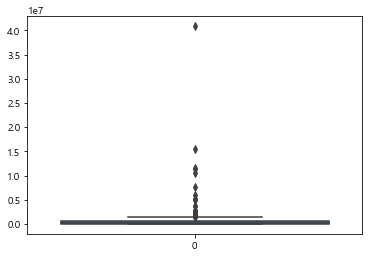

In [171]:
pd.options.display.float_format = '{:.5f}'.format
sns.boxplot(data=reg_time.카드이용금액계)

===> 최대최소 차이가 너무 나서 표현식 바꿀 것인지, 최대값을 이상치 처리할지 정하기

## reg_time과 reg_adr를 합칠 수 있나?

In [174]:
# 동일한 열 확인하기


# 블록별 데이터

In [21]:
pd.read_csv(path+'블록별 시간대별소액결제건수 카드소비패턴.csv', encoding='cp949').sample(2)

,서울시민업종코드(UPJONG_CD),기준년월(YM),시간대구간(TIME),고객주소블록코드(BLOCK_CD),카드이용금액계(AMT_CORR),소액결제건수(MICRO_PYM)
419,SS066,201605,1,8651,35,20
322,SS013,201810,5,415521,80,5


In [22]:
pd.read_csv(path+'블록별 성별연령대별 카드소비패턴.csv', encoding='cp949').sample(2)

,서울시민업종코드(UPJONG_CD),기준년월(YM),고객주소블록코드(BLOCK_CD),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
23,SS068,201604,214034,M,40대,101103,15
46,SS058,202104,354453,F,40대,336004,10
